In [1]:
# This file will try to understand the data set with "MAY_WEATHER_RES.csv"
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the comman below
%matplotlib inline
import pandas as pd
from numpy.random import randn
import numpy as np

In [2]:
df = pd.read_csv("MAY_WEATHER_RES.csv")

In [3]:
df.dtypes

Unnamed: 0           int64
TripId               int64
DayOfService        object
ProgrNumber          int64
StopPointId          int64
PlannedTime_Arr      int64
PlannedTime_Dep      int64
ActualTime_Arr       int64
ActualTime_Dep       int64
VehicleId            int64
LineId              object
RouteId             object
Direction            int64
dayInterval         object
Rain               float64
Sun                float64
Temp               float64
Wdsp                 int64
StationName         object
dtype: object

In [4]:
#df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Date'])
#df.to_csv("MAY_WEATHER_RES.csv")
#df = pd.read_csv("MAY_WEATHER_RES.csv")

In [8]:
df.TripId.count()

4716785

In [9]:
# Descriptive stats for continuous features
# df.describe() by default only prints stats for the numeric columns int64 and float64.
df.describe()

,Unnamed: 0,TripId,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Direction,Rain,Sun,Temp,Wdsp
count,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06,4.716785e+06
mean,2.358392e+06,4.724337e+06,3.115599e+01,2.510918e+03,5.306596e+04,5.306596e+04,5.322553e+04,5.323817e+04,1.744647e+06,1.507088e+00,3.713366e-02,4.247327e-01,1.345190e+01,9.551648e+00
std,1.361619e+06,1.748008e+05,1.992895e+01,2.009630e+03,1.742763e+04,1.742763e+04,1.744127e+04,1.744048e+04,7.229475e+05,4.999498e-01,1.821966e-01,4.387966e-01,2.989541e+00,4.269565e+00
min,0.000000e+00,4.591481e+06,1.000000e+00,2.000000e+00,1.678000e+04,1.678000e+04,1.653500e+04,1.653500e+04,1.000000e+03,1.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00,1.000000e+00
25%,1.179196e+06,4.597845e+06,1.500000e+01,9.560000e+02,3.770600e+04,3.770600e+04,3.785300e+04,3.786500e+04,1.000867e+06,1.000000e+00,0.000000e+00,0.000000e+00,1.140000e+01,6.000000e+00
50%,2.358392e+06,4.604433e+06,2.900000e+01,1.992000e+03,5.315100e+04,5.315100e+04,5.334000e+04,5.335500e+04,1.932322e+06,2.000000e+00,0.000000e+00,2.000000e-01,1.320000e+01,1.000000e+01
75%,3.537588e+06,4.894206e+06,4.500000e+01,3.715000e+03,6.707300e+04,6.707300e+04,6.733400e+04,6.734700e+04,2.534801e+06,2.000000e+00,0.000000e+00,1.000000e+00,1.540000e+01,1.300000e+01
max,4.716784e+06,5.019564e+06,1.090000e+02,7.660000e+03,8.639900e+04,8.639900e+04,8.867800e+04,8.867800e+04,2.693294e+06,2.000000e+00,1.350000e+01,1.000000e+00,2.420000e+01,2.300000e+01


In [10]:
# Descriptive stats for continuous features
# Transpose the table so it looks like the table in the lecture/book
# One feature per row, stats in the columns
# The 'count' column shows how many rows have data for that feature.
# We can see that Num Soft Tissue only has 490 rows defined (out of 500 rows total), so 10 rows are 
# missing this value.
# This Table does not show the cardinality and the %Missing columns.
# We compute them below.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4716785.0,2.358392e+06,1.361619e+06,0.0,1179196.0,2358392.0,3537588.0,4716784.0
TripId,4716785.0,4.724337e+06,1.748008e+05,4591481.0,4597845.0,4604433.0,4894206.0,5019564.0
ProgrNumber,4716785.0,3.115599e+01,1.992895e+01,1.0,15.0,29.0,45.0,109.0
StopPointId,4716785.0,2.510918e+03,2.009630e+03,2.0,956.0,1992.0,3715.0,7660.0
PlannedTime_Arr,4716785.0,5.306596e+04,1.742763e+04,16780.0,37706.0,53151.0,67073.0,86399.0
PlannedTime_Dep,4716785.0,5.306596e+04,1.742763e+04,16780.0,37706.0,53151.0,67073.0,86399.0
ActualTime_Arr,4716785.0,5.322553e+04,1.744127e+04,16535.0,37853.0,53340.0,67334.0,88678.0
ActualTime_Dep,4716785.0,5.323817e+04,1.744048e+04,16535.0,37865.0,53355.0,67347.0,88678.0
VehicleId,4716785.0,1.744647e+06,7.229475e+05,1000.0,1000867.0,1932322.0,2534801.0,2693294.0
Direction,4716785.0,1.507088e+00,4.999498e-01,1.0,1.0,2.0,2.0,2.0


In [11]:
#Keep only the numerical features.
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
# Select only the numeric features
df[numeric_columns]

,Unnamed: 0,TripId,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Direction,Rain,Sun,Temp,Wdsp
0,0,5013461,32,357,40811,40811,40693,40693,1001130,1,0.0,0.0,14.2,1
1,1,5013461,33,390,40859,40859,40722,40732,1001130,1,0.0,0.0,14.2,1
2,2,5013461,34,372,40904,40904,40776,40776,1001130,1,0.0,0.0,14.2,1
3,3,5013461,35,373,40941,40941,40799,40799,1001130,1,0.0,0.0,14.2,1
4,4,5013461,36,374,40974,40974,40822,40849,1001130,1,0.0,0.0,14.2,1
5,5,5013461,37,375,41027,41027,40916,40916,1001130,1,0.0,0.0,14.2,1
6,6,5013461,38,2804,41107,41107,41041,41050,1001130,1,0.0,0.0,14.2,1
7,7,5013461,39,376,41141,41141,41069,41069,1001130,1,0.0,0.0,14.2,1
8,8,5013461,40,377,41168,41168,41091,41105,1001130,1,0.0,0.0,14.2,1
9,9,5013189,1,226,40800,40800,41023,41023,1000184,1,0.0,0.0,14.2,1


In [12]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,DayOfService,LineId,RouteId,dayInterval,StationName
0,2017-05-29,1,1_37,2017-05-29 11:00:00,Casement
1,2017-05-29,1,1_37,2017-05-29 11:00:00,Casement
2,2017-05-29,1,1_37,2017-05-29 11:00:00,Casement
3,2017-05-29,1,1_37,2017-05-29 11:00:00,Casement
4,2017-05-29,1,1_37,2017-05-29 11:00:00,Casement


In [13]:
# Descriptive stats for categorical features only.
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
DayOfService,4716785,31,2017-05-03,370093
LineId,4716785,123,40,189057
RouteId,4716785,496,40_31,96928
dayInterval,4716785,529,2017-05-11 08:00:00,27247
StationName,4716785,1,Casement,4716785


In [21]:
df.head()

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,LineId,RouteId,Direction,dayInterval,Rain,Sun,Temp,Wdsp,StationName
0,5013461,2017-05-29,32,357,40811,40811,40693,40693,1001130,1,1_37,1,2017-05-29 11:00:00,0.0,0.0,14.2,1,Casement
1,5013461,2017-05-29,33,390,40859,40859,40722,40732,1001130,1,1_37,1,2017-05-29 11:00:00,0.0,0.0,14.2,1,Casement
2,5013461,2017-05-29,34,372,40904,40904,40776,40776,1001130,1,1_37,1,2017-05-29 11:00:00,0.0,0.0,14.2,1,Casement
3,5013461,2017-05-29,35,373,40941,40941,40799,40799,1001130,1,1_37,1,2017-05-29 11:00:00,0.0,0.0,14.2,1,Casement
4,5013461,2017-05-29,36,374,40974,40974,40822,40849,1001130,1,1_37,1,2017-05-29 11:00:00,0.0,0.0,14.2,1,Casement


# Data Quality Report: Visualisations

In [1]:
#df[numeric_columns].dtypes

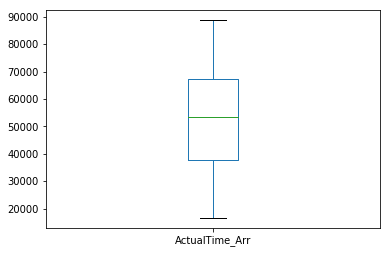

In [23]:
# Plot a boxplot for continuous feature Actual_Arr
%matplotlib inline
#plt.figure(figsize=(20,10))
df['ActualTime_Arr'].plot(kind='box')

<Figure size 432x288 with 0 Axes>

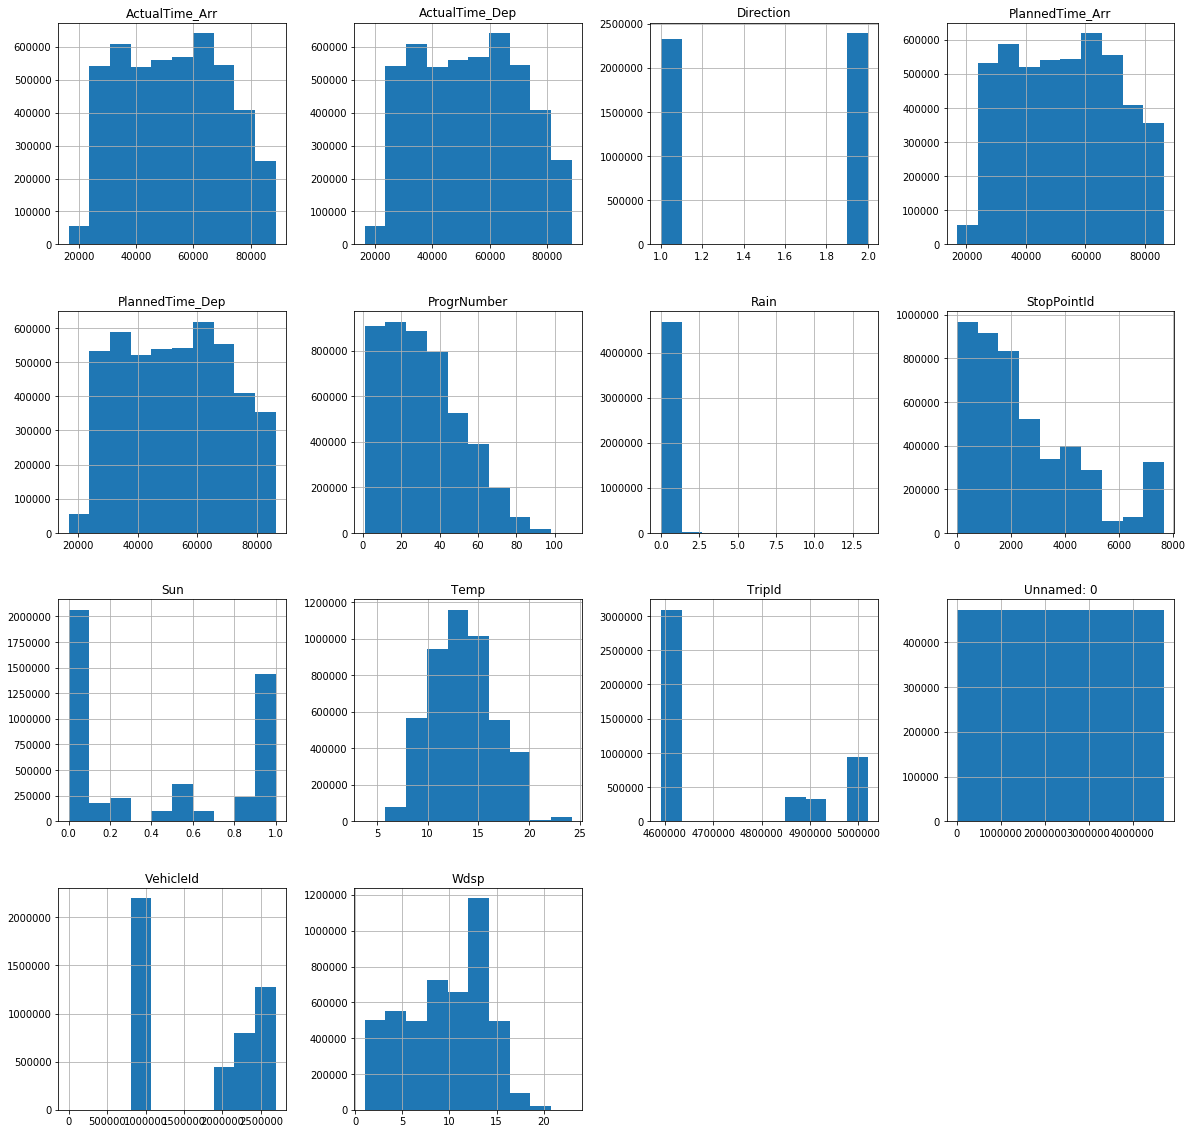

In [16]:
#http://pandas.pydata.org/pandas-docs/stable/visualization.html
# We can plot the histogram of all numeric features at the same time.
plt.figure()
df.hist(figsize=(20, 20))

# We can save the plot into a file s shown below.
plt.savefig('MAY-DataQualityReport-NumericFeatures-Histograms.png')

In [29]:
numeric_columns[1:]

Index(['TripId', 'ProgrNumber', 'StopPointId', 'PlannedTime_Arr',
       'PlannedTime_Dep', 'ActualTime_Arr', 'ActualTime_Dep', 'VehicleId',
       'Direction', 'Rain', 'Sun', 'Temp', 'Wdsp'],
      dtype='object')

MemoryError: 

<Figure size 7200x1440 with 0 Axes>

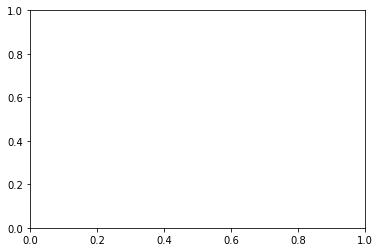

In [30]:
plt.figure(figsize=(100, 20))
#df['Income of Policy Holder'].plot(kind='box')
df[numeric_columns[1:]].plot(kind='box')
#df.hist(figsize=(20, 20))
plt.savefig('MAY-DataQualityReport-NumericFeatures-Boxplots.png')